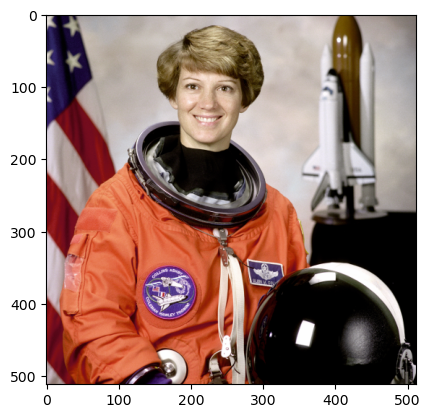

In [1]:
import skimage.data
import selectivesearch as ss
import matplotlib.pyplot as plt
import cv2 as cv

img = skimage.data.astronaut()
plt.imshow(img)

In [2]:
_, regions = ss.selective_search(img, scale=100, min_size=2000)

len(regions), regions[0]

c:\Users\user\anaconda3\Lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


(57, {'rect': (0, 0, 62, 156), 'size': 6934, 'labels': [0.0]})

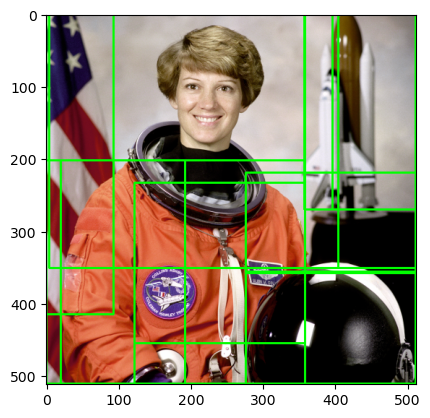

In [3]:
img_copy = img.copy()

green = [0, 255, 0]

for region in regions:
    if region['size'] > 20000:
        rect = region['rect']
        x = rect[0]
        y = rect[1]
        w = rect[2]
        h = rect[3]
        cv.rectangle(img_copy, (x, y), (x+w, y+h), green, 2)
    
plt.imshow(img_copy)

In [4]:
import numpy as np

# cand_box: 예측한 박스
# gt_box: 정답 박스
# 각 데이터는 x, y, w, h로 이루어진 리스트
def compute_iou(cand_box, gt_box):
    
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[0] + cand_box[2], gt_box[0] + gt_box[2])
    y2 = np.minimum(cand_box[1] + cand_box[3], gt_box[1] + gt_box[3])
    
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    
    cand_area = ((cand_box[0] + cand_box[2]) - cand_box[0]) * ((cand_box[1] + cand_box[3]) - cand_box[1])
    gt_area = ((gt_box[0] + gt_box[2]) - gt_box[0]) * ((gt_box[1] + gt_box[3]) - gt_box[1])
    
    union = cand_area + gt_area - intersection
    
    iou = intersection / union
    
    return iou

0.7


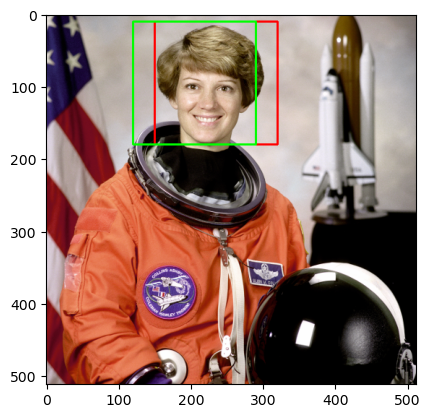

In [5]:
img_copy = img.copy()

gt = [150, 10, 170, 170]
cd = [120, 10, 170, 170]

iou = compute_iou(cd, gt)

red = [255, 0, 0]

cv.rectangle(img_copy, (gt[0], gt[1]), (gt[0]+gt[2], gt[1]+gt[3]), red, 2)
cv.rectangle(img_copy, (cd[0], cd[1]), (cd[0]+cd[2], cd[1]+cd[3]), green, 2)

plt.imshow(img_copy)
print(iou)

0.5820717381745084


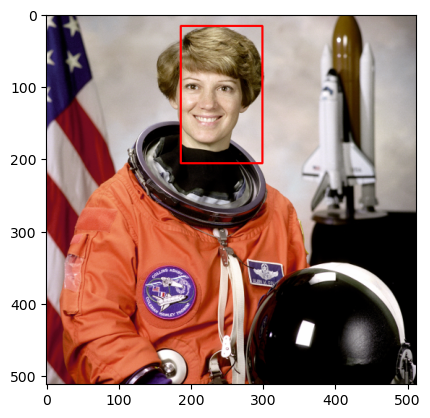

In [6]:
img_copy = img.copy()

for index, cand_box in enumerate(regions):
    rect = cand_box['rect']
    x = rect[0]
    y = rect[1]
    w = rect[2]
    h = rect[3]
    iou = compute_iou([x, y, w, h], gt)
    
    if iou > 0.5:
        print(iou)
        cv.rectangle(img_copy, (x, y), (x+w, y+h), red, 2)
        
plt.imshow(img_copy)